In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
UI_index_2006 = pd.read_csv('data/UI_index_2006.csv')
UI_index_2010 = pd.read_csv('data/UI_index_2010.csv')
UI_index_2014 = pd.read_csv('data/UI_index_2014.csv')
UI_index_2018 = pd.read_csv('data/UI_index_2018.csv')
UI_index_2022 = pd.read_csv('data/UI_index_2022.csv')

In [3]:
combined_df = pd.concat([UI_index_2006, UI_index_2010, UI_index_2014, UI_index_2018, UI_index_2022], ignore_index=True)

In [4]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125
...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680


In [5]:
columns_to_normalize = ['PUI', 'URI', 'LUI', 'EUI', 'EAL', 'LUL']
normalized_columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

for col in normalized_columns:
    combined_df[col] = pd.Series(dtype='float')

max_vals = combined_df[columns_to_normalize].max()
min_vals = combined_df[columns_to_normalize].min()

for col, norm_col in zip(columns_to_normalize, normalized_columns):
    combined_df[norm_col] = (combined_df[col] - min_vals[col]) / (max_vals[col] - min_vals[col])

In [6]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736780,0.079646,0.154280,0.971060,0.028767,0.790721
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570440,0.088129,0.091329,0.937331,0.021918,0.901186
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355840,0.019382,0.025005,0.711847,0.008634,0.854964
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265223,0.023174,0.030455,0.758068,0.010249,0.887552
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.373954,0.019806,0.021284,0.783260,0.004236,0.789645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404531,0.010363,0.008516,0.620446,0.002323,0.684393
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469579,0.005632,0.004432,0.706017,0.002463,0.602009
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545739,0.001511,0.001638,0.707058,0.000638,0.130556
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962244,0.057772,0.079686,0.983968,0.016918,0.342704


In [7]:

columns_to_shift = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']


for col in columns_to_shift:
    combined_df[col] = combined_df[col] + 0.0001

In [8]:
combined_df

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,0.079746,0.154380,0.971160,0.028867,0.790821
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,0.088229,0.091429,0.937431,0.022018,0.901286
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,0.019482,0.025105,0.711947,0.008734,0.855064
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,0.023274,0.030555,0.758168,0.010349,0.887652
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,0.019906,0.021384,0.783360,0.004336,0.789745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,0.010463,0.008616,0.620546,0.002423,0.684493
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,0.005732,0.004532,0.706117,0.002563,0.602109
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,0.001611,0.001738,0.707158,0.000738,0.130656
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,0.057872,0.079786,0.984068,0.017018,0.342804


In [9]:
def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(len(indicator_data))  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j


columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

entropies = combined_df[columns].apply(calculate_entropy, axis=0)

weights = (1 - entropies) / (1 - entropies).sum()

weighted_df = combined_df.copy()

for i, indicator in enumerate(columns):
    weighted_df[indicator + '_weighted'] = combined_df[indicator] * weights.values[i]

print("Weights:", weights)

UI = weighted_df

Weights: X1_star    0.033678
X2_star    0.314584
X3_star    0.299686
X4_star    0.011440
X5_star    0.332925
X6_star    0.007687
dtype: float64


In [10]:
UI

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,...,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted,X5_star_weighted,X6_star_weighted
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,...,0.154380,0.971160,0.028867,0.790821,0.024817,0.025087,0.046266,0.011110,0.009611,0.006079
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,...,0.091429,0.937431,0.022018,0.901286,0.019215,0.027755,0.027400,0.010724,0.007330,0.006928
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,...,0.025105,0.711947,0.008734,0.855064,0.011987,0.006129,0.007524,0.008145,0.002908,0.006573
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,...,0.030555,0.758168,0.010349,0.887652,0.008936,0.007322,0.009157,0.008673,0.003445,0.006823
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,...,0.021384,0.783360,0.004336,0.789745,0.012597,0.006262,0.006408,0.008962,0.001444,0.006071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,...,0.008616,0.620546,0.002423,0.684493,0.013627,0.003292,0.002582,0.007099,0.000807,0.005262
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,...,0.004532,0.706117,0.002563,0.602109,0.015818,0.001803,0.001358,0.008078,0.000853,0.004628
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,...,0.001738,0.707158,0.000738,0.130656,0.018383,0.000507,0.000521,0.008090,0.000246,0.001004
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,...,0.079786,0.984068,0.017018,0.342804,0.032410,0.018206,0.023911,0.011258,0.005666,0.002635


In [11]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
UI['PU'] = UI['X1_star_weighted'] + UI['X2_star_weighted']
UI['LU'] = UI['X3_star_weighted'] + UI['X6_star_weighted']
#comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] 
UI['EU'] = UI['X4_star_weighted'] + UI['X5_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
UI['PU_adj'] = UI['PU'].replace(0, small_positive_value)
UI['LU_adj'] = UI['LU'].replace(0, small_positive_value)
UI['EU_adj'] = UI['EU'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
UI['UI'] = UI['PU_adj'] + UI['LU_adj'] + UI['EU_adj']

# Check the result
UI[['Year', 'Name_of_Regions', 'PU', 'LU', 'EU', 'UI']].head()

,Year,Name_of_Regions,PU,LU,EU,UI
0,2006,Beijing,0.049904,0.052345,0.020721,0.122969
1,2006,Tianjin,0.046970,0.034328,0.018054,0.099353
2,2006,Shijiazhuang,0.018116,0.014096,0.011053,0.043265
3,2006,Tangshan,0.016257,0.015980,0.012119,0.044356
4,2006,Qinhuangdao,0.018860,0.012479,0.010405,0.041744


In [12]:
UI

,Name_of_Regions,Year,Citycode,PUI,URI,LUI,EUI,EAL,LUL,X1_star,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI
0,Beijing,2006,110000.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306,0.736880,...,0.011110,0.009611,0.006079,0.049904,0.052345,0.020721,0.049904,0.052345,0.020721,0.122969
1,Tianjin,2006,120000.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218,0.570540,...,0.010724,0.007330,0.006928,0.046970,0.034328,0.018054,0.046970,0.034328,0.018054,0.099353
2,Shijiazhuang,2006,130100.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306,0.355940,...,0.008145,0.002908,0.006573,0.018116,0.014096,0.011053,0.018116,0.014096,0.011053,0.043265
3,Tangshan,2006,130200.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938,0.265323,...,0.008673,0.003445,0.006823,0.016257,0.015980,0.012119,0.016257,0.015980,0.012119,0.044356
4,Qinhuangdao,2006,130300.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125,0.374054,...,0.008962,0.001444,0.006071,0.018860,0.012479,0.010405,0.018860,0.012479,0.010405,0.041744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,2022,640400.0,0.448000,0.000786,0.004282,0.8174,389.585709,232.605304,0.404631,...,0.007099,0.000807,0.005262,0.016919,0.007844,0.007906,0.016919,0.007844,0.007906,0.032668
1450,中卫,2022,640500.0,0.508300,0.000429,0.002259,0.8585,412.914562,207.871637,0.469679,...,0.008078,0.000853,0.004628,0.017621,0.005987,0.008931,0.017621,0.005987,0.008931,0.032539
1451,新疆,2022,650000.0,0.578900,0.000118,0.000876,0.8590,108.803216,66.331128,0.545839,...,0.008090,0.000246,0.001004,0.018890,0.001525,0.008336,0.018890,0.001525,0.008336,0.028750
1452,乌鲁木齐,2022,650100.0,0.965000,0.004363,0.039520,0.9920,2822.446168,130.022680,0.962344,...,0.011258,0.005666,0.002635,0.050616,0.026546,0.016924,0.050616,0.026546,0.016924,0.094085


In [15]:
UER_index_2006 = pd.read_csv('data/UER_index_2006.csv')
UER_index_2010 = pd.read_csv('data/UER_index_2010.csv')
UER_index_2014 = pd.read_csv('data/UER_index_2014.csv')
UER_index_2018 = pd.read_csv('data/UER_index_2018.csv')
UER_index_2022 = pd.read_csv('data/UER_index_2022.csv')

In [16]:
combined_UER = pd.concat([UER_index_2006, UER_index_2010, UER_index_2014, UER_index_2018, UER_index_2022], ignore_index=True)

In [17]:
combined_UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29
...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17


In [18]:
columns_to_normalize = {
    'Res1': 'X1_star',
    'Res2': 'X2_star',
    'Ada1': 'X3_star',
    'Ada2': 'X4_star',
    'Rec1': 'X5_star',
    'Rec2': 'X6_star'
}

for new_col in columns_to_normalize.values():
    combined_UER[new_col] = pd.Series(dtype='float')

max_vals = combined_UER[list(columns_to_normalize.keys())].max()
min_vals = combined_UER[list(columns_to_normalize.keys())].min()

for col, norm_col in columns_to_normalize.items():
    if col in ['Res1', 'Res2']:  
        combined_UER[norm_col] = (max_vals[col] - combined_UER[col]) / (max_vals[col] - min_vals[col])
    else:  
        combined_UER[norm_col] = (combined_UER[col] - min_vals[col]) / (max_vals[col] - min_vals[col])

In [19]:
combined_UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992452,0.996846,0.536383,0.472141,0.465512,0.142305
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969211,0.973984,0.653366,0.538559,0.058268,0.087808
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930265,0.927530,0.636303,0.633152,0.379528,0.109793
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929001,0.897091,0.409242,0.626187,0.442730,0.119254
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941723,0.951682,0.610410,0.633152,0.448294,0.110460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998518,0.996222,0.440712,0.633152,0.440840,0.427715
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989136,0.985851,0.429823,0.633152,0.461837,0.315523
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995257,0.959485,0.277968,0.633152,0.432231,0.198934
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995577,0.992923,0.593679,0.633152,0.417113,0.175483


In [20]:
columns_to_shift = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

for col in columns_to_shift:
    combined_UER[col] = combined_UER[col] + 0.0001

In [21]:
def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(len(indicator_data))  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j


columns = ['X1_star', 'X2_star', 'X3_star', 'X4_star', 'X5_star', 'X6_star']

entropies = combined_UER[columns].apply(calculate_entropy, axis=0)

weights = (1 - entropies) / (1 - entropies).sum()

weighted_df = combined_UER.copy()

for i, indicator in enumerate(columns):
    weighted_df[indicator + '_weighted'] = combined_UER[indicator] * weights.values[i]

print("Weights:", weights)

UER = weighted_df

Weights: X1_star    0.008056
X2_star    0.016018
X3_star    0.238940
X4_star    0.303342
X5_star    0.113917
X6_star    0.319727
dtype: float64


In [22]:
UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,...,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted,X5_star_weighted,X6_star_weighted
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992552,...,0.536483,0.472241,0.465612,0.142405,0.007996,0.015969,0.128187,0.143251,0.053041,0.045531
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969311,...,0.653466,0.538659,0.058368,0.087908,0.007809,0.015603,0.156139,0.163398,0.006649,0.028107
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930365,...,0.636403,0.633252,0.379628,0.109893,0.007495,0.014858,0.152062,0.192092,0.043246,0.035136
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929101,...,0.409342,0.626287,0.442830,0.119354,0.007485,0.014371,0.097808,0.189979,0.050446,0.038161
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941823,...,0.610510,0.633252,0.448394,0.110560,0.007588,0.015245,0.145875,0.192092,0.051080,0.035349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998618,...,0.440812,0.633252,0.440940,0.427815,0.008045,0.015959,0.105328,0.192092,0.050231,0.136784
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989236,...,0.429923,0.633252,0.461937,0.315623,0.007970,0.015793,0.102726,0.192092,0.052623,0.100913
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995357,...,0.278068,0.633252,0.432331,0.199034,0.008019,0.015370,0.066442,0.192092,0.049250,0.063637
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995677,...,0.593779,0.633252,0.417213,0.175583,0.008022,0.015906,0.141878,0.192092,0.047528,0.056139


In [23]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
UER['RES'] = UER['X1_star_weighted'] + UER['X2_star_weighted']
UER['ADA'] = UER['X3_star_weighted'] + UER['X4_star_weighted']
#comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] 
UER['REC'] = UER['X6_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
UER['REC_adj'] = UER['REC'].replace(0, small_positive_value)
UER['ADA_adj'] = UER['ADA'].replace(0, small_positive_value)
UER['RES_adj'] = UER['RES'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
UER['UER'] = (UER['RES_adj'] * UER['ADA_adj'] * UER['REC_adj']) ** (1/3)
#UER['UER'] = UER['RES_adj'] + UER['ADA_adj'] + UER['REC_adj']
# Check the result
UER[['Year', 'Name_of_Regions', 'RES', 'ADA', 'REC', 'UER']].head()

,Year,Name_of_Regions,RES,ADA,REC,UER
0,2006,Beijing,0.023965,0.271438,0.045531,0.066658
1,2006,Tianjin,0.023412,0.319537,0.028107,0.059464
2,2006,Shijiazhuang,0.022354,0.344154,0.035136,0.064657
3,2006,Tangshan,0.021856,0.287787,0.038161,0.062147
4,2006,Qinhuangdao,0.022833,0.337967,0.035349,0.064854


In [24]:
UER

,Name_of_Regions,Citycode,Year,Res1,Res2,Ada1,Ada2,Rec1,Rec2,X1_star,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,RES,ADA,REC,REC_adj,ADA_adj,RES_adj,UER
0,Beijing,110000.0,2006,0.000129,0.000186,80.790000,74.57,44.34,10.68,0.992552,...,0.143251,0.053041,0.045531,0.023965,0.271438,0.045531,0.045531,0.271438,0.023965,0.066658
1,Tianjin,120000.0,2006,0.000527,0.001535,98.410000,85.06,5.55,6.59,0.969311,...,0.163398,0.006649,0.028107,0.023412,0.319537,0.028107,0.028107,0.319537,0.023412,0.059464
2,Shijiazhuang,130100.0,2006,0.001194,0.004276,95.840000,100.00,36.15,8.24,0.930365,...,0.192092,0.043246,0.035136,0.022354,0.344154,0.035136,0.035136,0.344154,0.022354,0.064657
3,Tangshan,130200.0,2006,0.001216,0.006072,61.640000,98.90,42.17,8.95,0.929101,...,0.189979,0.050446,0.038161,0.021856,0.287787,0.038161,0.038161,0.287787,0.021856,0.062147
4,Qinhuangdao,130300.0,2006,0.000998,0.002851,91.940000,100.00,42.70,8.29,0.941823,...,0.192092,0.051080,0.035349,0.022833,0.337967,0.035349,0.035349,0.337967,0.022833,0.064854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,固原,640400.0,2022,0.000025,0.000223,66.380000,100.00,41.99,32.10,0.998618,...,0.192092,0.050231,0.136784,0.024004,0.297419,0.136784,0.136784,0.297419,0.024004,0.099212
1450,中卫,640500.0,2022,0.000186,0.000835,64.740000,100.00,43.99,23.68,0.989236,...,0.192092,0.052623,0.100913,0.023762,0.294818,0.100913,0.100913,0.294818,0.023762,0.089083
1451,新疆,650000.0,2022,0.000081,0.002391,41.867498,100.00,41.17,14.93,0.995357,...,0.192092,0.049250,0.063637,0.023389,0.258533,0.063637,0.063637,0.258533,0.023389,0.072735
1452,乌鲁木齐,650100.0,2022,0.000076,0.000418,89.420000,100.00,39.73,13.17,0.995677,...,0.192092,0.047528,0.056139,0.023927,0.333970,0.056139,0.056139,0.333970,0.023927,0.076552


In [26]:
UI_subset = UI[['Name_of_Regions', 'Year', 'Citycode', 'UI']]
UER_subset = UER[['Name_of_Regions', 'Citycode', 'Year', 'UER']]

In [27]:
merged_df = pd.merge(UI_subset, UER_subset, on=['Year', 'Citycode'], how='inner')

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 68.2+ KB


In [29]:
left_merged_df = pd.merge(UER_subset, merged_df, on=['Year', 'Citycode'], how='left', indicator=True)

missing_rows = left_merged_df[left_merged_df['_merge'] == 'left_only']
missing_rows

,Name_of_Regions,Citycode,Year,UER_x,Name_of_Regions_x,UI,Name_of_Regions_y,UER_y,_merge
104,Chaohu,NaN,2006,0.028269,NaN,NaN,NaN,NaN,left_only
140,Iaiwu,NaN,2006,0.074789,NaN,NaN,NaN,NaN,left_only


In [30]:
def calculate_C(UI, UER):
    return np.sqrt((UI * UER) / ((UI + UER) / 2)**2)

def calculate_T(UI, UER, mu1=0.5, mu2=0.5):
    return mu1 * UI + mu2 * UER

def calculate_D(C, T):
    return np.sqrt(C * T)

merged_df['C'] = merged_df.apply(lambda row: calculate_C(row['UI'], row['UER']), axis=1)

merged_df['T'] = merged_df.apply(lambda row: calculate_T(row['UI'], row['UER']), axis=1)

merged_df['D'] = merged_df.apply(lambda row: calculate_D(row['C'], row['T']), axis=1)

In [31]:
merged_df

,Name_of_Regions_x,Year,Citycode,UI,Name_of_Regions_y,UER,C,T,D
0,Beijing,2006,110000.0,0.122969,Beijing,0.066658,0.954891,0.094813,0.300893
1,Tianjin,2006,120000.0,0.099353,Tianjin,0.059464,0.967945,0.079408,0.277242
2,Shijiazhuang,2006,130100.0,0.043265,Shijiazhuang,0.064657,0.980158,0.053961,0.229979
3,Tangshan,2006,130200.0,0.044356,Tangshan,0.062147,0.985949,0.053252,0.229136
4,Qinhuangdao,2006,130300.0,0.041744,Qinhuangdao,0.064854,0.976217,0.053299,0.228104
...,...,...,...,...,...,...,...,...,...
1447,固原,2022,640400.0,0.032668,固原,0.099212,0.863368,0.065940,0.238601
1448,中卫,2022,640500.0,0.032539,中卫,0.089083,0.885354,0.060811,0.232033
1449,新疆,2022,650000.0,0.028750,新疆,0.072735,0.901197,0.050743,0.213844
1450,乌鲁木齐,2022,650100.0,0.094085,乌鲁木齐,0.076552,0.994707,0.085318,0.291319


In [32]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

merged_df['UI_normalized'] = normalize(merged_df['UI'])
merged_df['UER_normalized'] = normalize(merged_df['UER'])

def calculate_C(UI, UER):
    return np.sqrt((UI * UER) / ((UI + UER) / 2)**2)

def calculate_T(UI, UER, mu1=0.5, mu2=0.5):
    return mu1 * UI + mu2 * UER

def calculate_D(C, T):
    return np.sqrt(C * T)

merged_df['C2'] = merged_df.apply(lambda row: calculate_C(row['UI_normalized'], row['UER_normalized']), axis=1)

merged_df['T2'] = merged_df.apply(lambda row: calculate_T(row['UI_normalized'], row['UER_normalized']), axis=1)

merged_df['D2'] = merged_df.apply(lambda row: calculate_D(row['C2'], row['T2']), axis=1)

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name_of_Regions_x  1452 non-null   object 
 1   Year               1452 non-null   int64  
 2   Citycode           1452 non-null   float64
 3   UI                 1452 non-null   float64
 4   Name_of_Regions_y  1452 non-null   object 
 5   UER                1452 non-null   float64
 6   C                  1452 non-null   float64
 7   T                  1452 non-null   float64
 8   D                  1452 non-null   float64
 9   UI_normalized      1452 non-null   float64
 10  UER_normalized     1452 non-null   float64
 11  C2                 1452 non-null   float64
 12  T2                 1452 non-null   float64
 13  D2                 1452 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 158.9+ KB


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

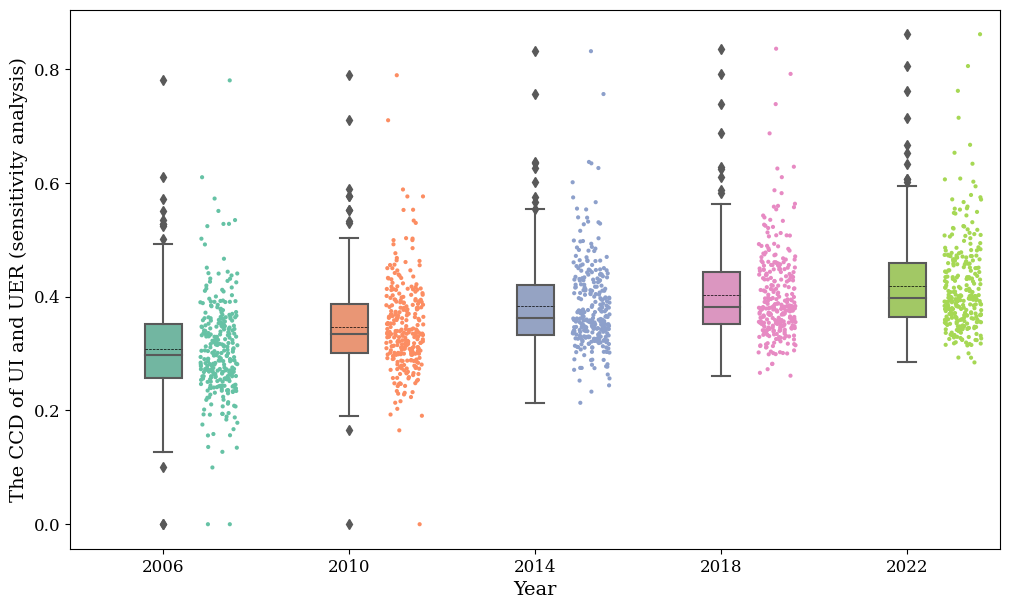

In [37]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Create a boxplot with the desired settings
box = sns.boxplot(x='Year', y='D2', data=merged_df, palette="Set2", width=0.2, showmeans=True,
                  meanline=True, meanprops={'color': 'black', 'linewidth': 0.5})

# Overlay with a stripplot to show the points
strip = sns.stripplot(x='Year', y='D2', data=merged_df, palette="Set2", size=3, jitter=True)

# Adjust the positions of the boxplot (left)
current_positions = [patch.get_x() for patch in box.artists]
for i, box_artist in enumerate(box.artists):
    box_artist.set_x(current_positions[i] - 0.3)  # Shift box to the left
    for j in range(6*i, 6*(i+1)):
         line = box.lines[j]
         line.set_xdata(line.get_xdata() - 0.3)  # Shift lines to the left

# Adjust the positions of the stripplot (right) by increasing the x value
for i, strip in enumerate(strip.collections):
    strip.set_offsets([(x + 0.30, y) for x, y in strip.get_offsets()])  # Shift points to the right

# Set the edgecolor and linewidth for boxplot to match the fill color
for patch in box.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_edgecolor((r, g, b))
    patch.set_linewidth(3)

# Set plot title and labels with a different serif font
plt.xlabel('Year', fontname='DejaVu Serif', fontsize=14)
plt.ylabel('The CCD of UI and UER (sensitivity analysis)', fontname='DejaVu Serif', fontsize=14)

# Customize the ticks' font to a different serif font
plt.xticks(fontname='DejaVu Serif', fontsize=12)
plt.yticks(fontname='DejaVu Serif', fontsize=12)

# Save the plot
plt.savefig("d_values_by_year.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Calculation of D2 statistics

In [35]:
# Select the D2 column data for the specified year
years = [2006, 2010, 2014, 2018, 2022]
filtered_df = merged_df[merged_df['Year'].isin(years)]

# Initialize the dictionary that stores the results
results = {}

for year in years:
    year_data = filtered_df[filtered_df['Year'] == year]['D2']
    mean_D2_year = year_data.mean()
    std_D2_year = year_data.std()
    cv_D2_year = (std_D2_year / mean_D2_year) * 100
    max_D2_year = year_data.max()  
    min_D2_year = year_data.min() 

    results[year] = {
        'Average D2': mean_D2_year,
        'Standard Deviation of D2': std_D2_year,
        'Coefficient of Variation (CV) of D2': cv_D2_year,
        'Max D2': max_D2_year,  
        'Min D2': min_D2_year   
    }

    print(f"Year: {year}")
    print(f"  Average D2: {mean_D2_year}")
    print(f"  Standard Deviation of D2: {std_D2_year}")
    print(f"  Coefficient of Variation (CV) of D2: {cv_D2_year}%")
    print(f"  Max D2: {max_D2_year}")
    print(f"  Min D2: {min_D2_year}")
    print()

mean_D2_all = filtered_df['D2'].mean()
std_D2_all = filtered_df['D2'].std()
cv_D2_all = (std_D2_all / mean_D2_all) * 100
max_D2_all = filtered_df['D2'].max()  
min_D2_all = filtered_df['D2'].min()  

print("Overall:")
print(f"  Average D2: {mean_D2_all}")
print(f"  Standard Deviation of D2: {std_D2_all}")
print(f"  Coefficient of Variation (CV) of D2: {cv_D2_all}%")
print(f"  Max D2: {max_D2_all}")
print(f"  Min D2: {min_D2_all}")

Year: 2006
  Average D2: 0.3072163551628634
  Standard Deviation of D2: 0.08621080832147877
  Coefficient of Variation (CV) of D2: 28.061920165603222%
  Max D2: 0.780015736810585
  Min D2: 0.0

Year: 2010
  Average D2: 0.34671871776799157
  Standard Deviation of D2: 0.08060832712570395
  Coefficient of Variation (CV) of D2: 23.248911291729968%
  Max D2: 0.7890688587081109
  Min D2: 0.0

Year: 2014
  Average D2: 0.38285915385440844
  Standard Deviation of D2: 0.07765363261209152
  Coefficient of Variation (CV) of D2: 20.28255869823638%
  Max D2: 0.8313272064111079
  Min D2: 0.2134018055545466

Year: 2018
  Average D2: 0.40260340775061093
  Standard Deviation of D2: 0.07946429606630176
  Coefficient of Variation (CV) of D2: 19.73761139039469%
  Max D2: 0.8357121934634304
  Min D2: 0.2610259781996771

Year: 2022
  Average D2: 0.41938529530497004
  Standard Deviation of D2: 0.0823976382871073
  Coefficient of Variation (CV) of D2: 19.647240666172884%
  Max D2: 0.8611406202825435
  Min D2: 